In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 22
%matplotlib inline

In [2]:
def rolling_apply(fun, a, w):
    r = np.empty(a.shape)
    r.fill(0)
    for i in range(0, a.shape[0]):
        r[i] = fun(a[(i-w+1):i+1])
    return r

In [3]:
rewards_resnet = np.load('runs/resnet/results.npy')
rewards_cnn = np.load('runs/cnn/results.npy')
rewards_mlp = np.load('runs/mlp/results.npy')

reward_list = [rewards_resnet, rewards_cnn, rewards_mlp]
labels = ['Resnet', 'CNN-mlp', 'MLP']

print(len(rewards_cnn))

501


In [4]:
np.mean(rewards_resnet[12500-100:12500]), np.std(rewards_resnet[12500-100:12500])

/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/users/aadeleye/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

In [5]:
np.mean(rewards_cnn[12500-100:12500]), np.std(rewards_cnn[12500-100:12500])

(nan, nan)

In [6]:
np.mean(rewards_mlp[12500-100:12500]), np.std(rewards_mlp[12500-100:12500])

(nan, nan)

In [7]:
myopic = np.load('runs/myopic/rewards_test.npy')
#myopic

In [8]:

means = [rolling_apply(np.mean, r, 100) for r in reward_list]
t = np.arange(means[0].shape[0])

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


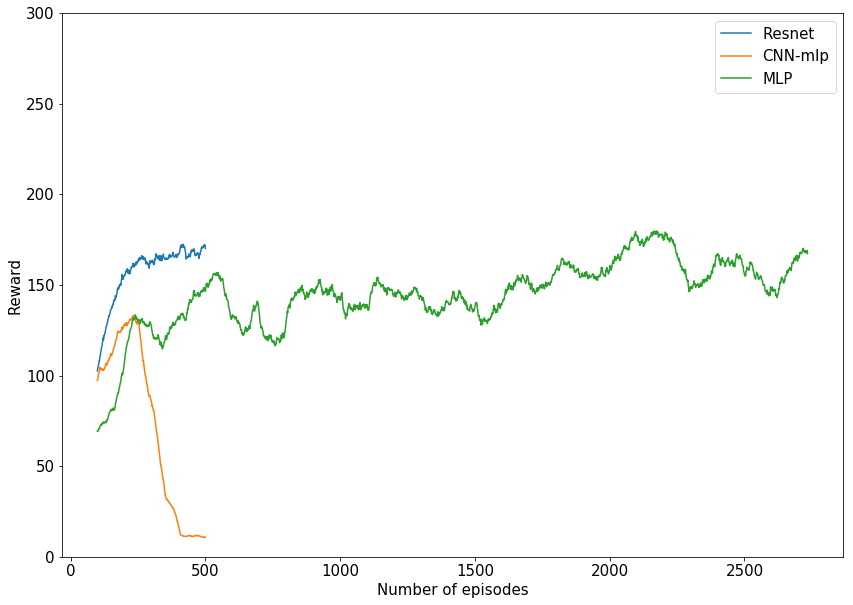

In [9]:
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Reward')
for i in range(len(means)):
    ax.plot(np.arange(means[i].shape[0])[:12500], means[i][:12500], label=labels[i])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.ylim(0, 300)
plt.legend(fontsize=15)
plt.savefig('paper/figs/learningcurve.pdf')

In [ ]:
np.min(meanz)